In [1]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from matplotlib import pyplot as plt

## Spectral Clustering
### Algorithm
The algorithm can be broken down into 4 basic steps.
- Construct a similarity graph
- Determine the Adjacency matrix W, Degree matrix D and the Laplacian matrix L

- First, we construct the similarity matrix, a NxN matrix where N is the number of samples. We fill the cells with the euclidean distance between each pair of points.
- Then we create the adjacency matrix by copying the contents of the similarity matrix and only this time, we set a threshold such that if the distance is greater than the predefined limit, we set the value to 0 and 1 otherwise.
- The adjacency matrix can then be used to build a graph. If there’s a 1 in the cell of the adjacency matrix then we draw an edge between the nodes of the column and row.


### Laplacian Matrix
Laplacian Matrix (L) is obtained by subtracting the Adjacency Matrix from the Degree Matrix (L = D – A). Eigenvalues of L, attribute to the properties leveraged by Spectral Clustering. The purpose of calculating the Graph Laplacian is to find eigenvalues and eigenvectors for it. This is then used to project the data points into a low-dimensional space.

- To identify optimal clusters in data, the Graph Laplacian matrix should approximately be a block diagonal matrix. Each block of such a matrix represents a cluster.

### The data needs to be projected to a low-dimensional space. Eigenvalues and their respective eigenvectors are calculated. 

- Suppose the optimal number of clusters is c, then the first c eigenvalues and their corresponding eigenvectors are taken. 
- These are then put into a matrix where the columns are the eigenvectors.
- After this, each node in the data is given a row of the Graph Laplacian Matrix.
- Then any clustering technique is applied to this reduced data.

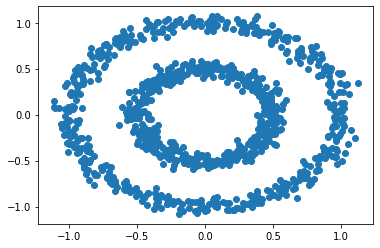

In [14]:
X, clusters = make_circles(n_samples=1000, noise=.05, factor=.5, random_state=0)
plt.scatter(X[:,0], X[:,1])

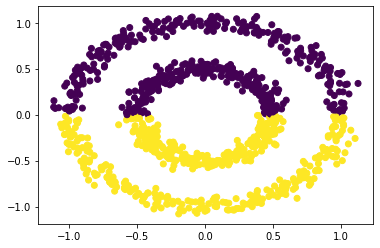

In [15]:
km = KMeans(init='k-means++', n_clusters=2)
km_clustering = km.fit(X)
plt.scatter(X[:,0], X[:,1], c=km_clustering.labels_)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


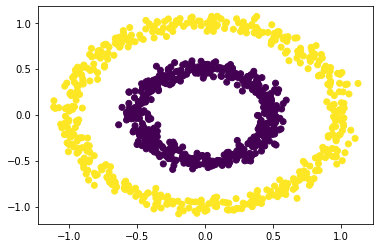

In [16]:
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)
sc_clustering = sc.fit(X)
plt.scatter(X[:,0], X[:,1], c=sc_clustering.labels_)

## Spectral Coclustering

Text(0.5, 1.0, 'Original dataset')

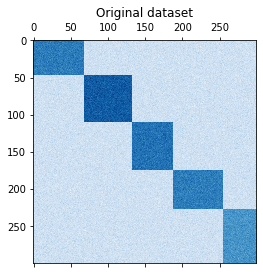

In [1]:
# Author: Kemal Eren <kemal@kemaleren.com>
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_biclusters
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score

data, rows, columns = make_biclusters(
    shape=(300, 300), n_clusters=5, noise=5, shuffle=False, random_state=0
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

Text(0.5, 1.0, 'Shuffled dataset')

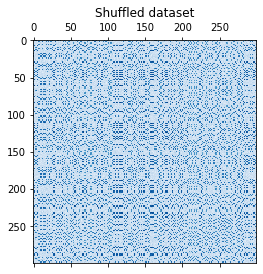

In [2]:
# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

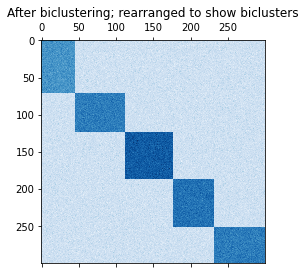

In [3]:
model = SpectralCoclustering(n_clusters=5, random_state=0)
model.fit(data)

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

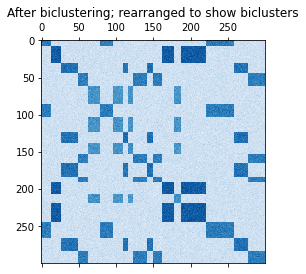

In [6]:
model = SpectralCoclustering(n_clusters=20, random_state=0)
model.fit(data)

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()